#  REAL ESTATE ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading train Data
train_data = pd.read_csv('C:/Users/saipa/Desktop/Project 1/train.csv')
display(train_data)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27316,279212,NaN,140,43,72,Puerto Rico,PR,Coamo,Coamo,Urban,...,42.73154,40.16667,24.79821,230.87898,938.0,0.60422,0.24603,0.03042,0.02249,0.14683
27317,277856,NaN,140,91,42,Pennsylvania,PA,Blue Bell,Blue Bell,Borough,...,38.21269,39.50000,21.84826,496.20427,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888
27318,233000,NaN,140,87,8,Colorado,CO,Weldona,Saddle Ridge,City,...,43.40218,46.33333,23.40858,316.52078,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712
27319,287425,NaN,140,439,48,Texas,TX,Colleyville,Colleyville City,Town,...,39.25921,43.41667,21.36235,1373.94120,5815.0,0.93970,0.75503,0.02287,0.00915,0.05261


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [4]:
# Duplicates
train_data.duplicated().value_counts()

False    27161
True       160
dtype: int64

In [5]:
# Droping Duplicates
train_data.drop_duplicates(inplace = True)

In [6]:
train_data.duplicated().value_counts()

False    27161
dtype: int64

In [7]:
# Loading test Data
test_data = pd.read_csv('C:/Users/saipa/Desktop/Project 1/test.csv')
display(test_data)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11704,238088,NaN,140,105,12,Florida,FL,Lakeland,Crystal Springs,City,...,53.51255,59.58333,23.23426,699.33353,2914.0,0.93121,0.65969,0.02135,0.02135,0.08780
11705,242811,NaN,140,31,17,Illinois,IL,Chicago,Chicago City,Village,...,33.14169,32.83333,20.24698,306.63915,1191.0,0.33122,0.42882,0.07781,0.02829,0.05305
11706,250127,NaN,140,9,25,Massachusetts,MA,Lawrence,Methuen Town City,City,...,43.53905,43.66667,23.17995,900.13903,3723.0,0.84372,0.50269,0.00108,0.00108,0.07294
11707,241096,NaN,140,27,19,Iowa,IA,Carroll,Carroll City,City,...,45.63179,48.16667,24.84209,693.82905,3213.0,0.83330,0.66699,0.02738,0.00000,0.04694


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [9]:
test_data.shape, train_data.shape

((11709, 80), (27161, 80))

In [10]:
test_data.duplicated().value_counts()

False    11677
True        32
dtype: int64

In [11]:
test_data.drop_duplicates(inplace = True)

In [12]:
test_data.duplicated().value_counts()

False    11677
dtype: int64

In [13]:
train_data.nunique()

UID            27161
BLOCKID            0
SUMLEVEL           1
COUNTYID         296
STATEID           52
               ...  
pct_own        22302
married        20282
married_snp    10350
separated       6190
divorced       13688
Length: 80, dtype: int64

In [14]:
len(train_data['UID'])

27161

In [15]:
# Finding Primary Key
for column in test_data:
    if train_data[column].nunique() == len(train_data[column]):
        print(column)

UID


##### UID is unique value, so it is considered as primary key

In [16]:
train_data.isnull().any().sum()

59

In [17]:
train_data.isnull().sum()

UID                0
BLOCKID        27161
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          207
married          150
married_snp      150
separated        150
divorced         150
Length: 80, dtype: int64

In [18]:
train_data.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [19]:
# Finding Null Percentage in train Data
for i in train_data:
    null = train_data[i].isnull().sum()/len(train_data[i])
display(null)

0.005522624351091639

##### There are 5% Null values in train Data

In [20]:
# Finding No of Null Values in each Variable
null = train_data.isnull().sum()
null

UID                0
BLOCKID        27161
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          207
married          150
married_snp      150
separated        150
divorced         150
Length: 80, dtype: int64

In [21]:
# Finding Null Percentage in each variable
na = []
for i in train_data.columns:
    n = train_data[i].isnull().sum()/len(train_data[i])
    na.append(n)
    

null_rate = pd.DataFrame(columns = ['Columns', 'Null Rate'])
null_rate['Columns'] = train_data.columns
null_rate['Null Rate'] = na
null_rate.sort_values(by = 'Null Rate', ascending = False).head(30)

,Columns,Null Rate
1,BLOCKID,1.000000
51,hc_median,0.017599
54,hc_sample_weight,0.017599
53,hc_samples,0.017599
52,hc_stdev,0.017599
50,hc_mean,0.017599
47,hc_mortgage_stdev,0.016273
46,hc_mortgage_median,0.016273
45,hc_mortgage_mean,0.016273
48,hc_mortgage_sample_weight,0.016273


#### Block id is an Empty column and Sumlevel has same text so drop both columns

In [22]:
# Dropping BLOCKID & SUMLEVEL
train_data_mod = train_data.drop(['BLOCKID', 'SUMLEVEL'], axis = 1)

In [23]:
train_data_mod.shape

(27161, 78)

In [24]:
# Filling Null values with Median of related column values
for i in train_data_mod.columns:
    length = train_data_mod[i].count()
    if len(train_data_mod) > length:
        train_data_mod[i].fillna(train_data_mod[i].median(), inplace = True)
train_data_mod.isnull().sum()

UID            0
COUNTYID       0
STATEID        0
state          0
state_ab       0
              ..
pct_own        0
married        0
married_snp    0
separated      0
divorced       0
Length: 78, dtype: int64

In [25]:
train_data_mod.shape

(27161, 78)

In [26]:
train_data_mod.describe()

,UID,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,27161.000000,27161.000000,27161.000000,27161.000000,27161.000000,27161.000000,27161.000000,2.716100e+04,2.716100e+04,27161.000000,...,27161.000000,27161.000000,27161.000000,27161.000000,27161.000000,27161.000000,27161.000000,27161.000000,27161.000000,27161.000000
mean,257328.592209,85.660322,28.267185,50105.133243,596.589816,37.519180,-91.297136,1.300509e+08,6.542839e+06,4324.547218,...,40.354822,40.396389,22.215136,544.050544,2210.368580,0.642645,0.509411,0.047297,0.019042,0.100357
std,21342.667653,98.373195,16.385918,29546.218041,232.424069,5.585968,16.340783,1.279231e+09,2.193149e+08,2131.542105,...,5.804742,7.961668,2.440650,279.865165,1080.272381,0.223369,0.135332,0.037059,0.020691,0.048674
min,220342.000000,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,0.000000e+00,0.000000,...,16.008330,13.250000,0.556780,0.664700,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238826.000000,29.000000,13.000000,26847.000000,405.000000,33.906105,-97.819063,1.809071e+06,0.000000e+00,2895.000000,...,36.956900,35.000000,21.331420,357.654080,1479.000000,0.506600,0.427330,0.020940,0.004620,0.066210
50%,257212.000000,63.000000,28.000000,47804.000000,614.000000,38.760645,-86.571868,4.888017e+06,2.779500e+04,4049.000000,...,40.389660,40.583330,22.520945,503.969830,2068.000000,0.691585,0.527230,0.038770,0.013460,0.095330
75%,275810.000000,109.000000,42.000000,77093.000000,801.000000,41.393414,-79.802626,3.373467e+07,5.252160e+05,5435.000000,...,43.554170,45.333330,23.570250,679.190520,2766.000000,0.816640,0.605640,0.064700,0.027330,0.128830
max,294334.000000,840.000000,72.000000,99925.000000,989.000000,67.074017,-65.379332,1.039510e+11,2.453228e+10,53812.000000,...,79.837390,82.250000,30.241270,6197.995200,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000


In [27]:
# Performing same steps to test Data
test_data_mod = test_data.drop(['BLOCKID', 'SUMLEVEL'], axis = 1)

In [28]:
test_data_mod.shape

(11677, 78)

In [29]:
for i in test_data_mod.columns:
    length = test_data_mod[i].count()
    if len(test_data_mod) > length:
        test_data_mod[i].fillna(test_data_mod[i].median(), inplace = True)
test_data_mod.isnull().sum()

UID            0
COUNTYID       0
STATEID        0
state          0
state_ab       0
              ..
pct_own        0
married        0
married_snp    0
separated      0
divorced       0
Length: 78, dtype: int64

In [30]:
test_data_mod.describe()

,UID,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,11677.000000,11677.000000,11677.000000,11677.000000,11677.000000,11677.000000,11677.000000,1.167700e+04,1.167700e+04,11677.000000,...,11677.000000,11677.000000,11677.000000,11677.000000,11677.000000,11677.000000,11677.000000,11677.000000,11677.000000,11677.000000
mean,257515.084953,85.810054,28.481459,50136.617796,593.626103,37.404823,-91.342375,1.087706e+08,5.165436e+06,4372.098827,...,40.129432,40.154006,22.163172,549.757733,2232.878608,0.635429,0.506144,0.047842,0.019306,0.099242
std,21471.783064,99.395979,16.609621,29762.242840,232.054490,5.626697,16.402506,7.570166e+08,1.524731e+08,2119.148500,...,5.798953,7.922483,2.512129,278.128624,1067.542637,0.230184,0.138724,0.038453,0.021348,0.048282
min,220336.000000,1.000000,1.000000,601.000000,201.000000,17.965835,-166.770979,8.299000e+03,0.000000e+00,0.000000,...,15.360240,12.833330,0.737110,0.251910,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238811.000000,29.000000,13.000000,25701.000000,404.000000,33.916899,-97.805299,1.721296e+06,0.000000e+00,2940.000000,...,36.773930,34.750000,21.294030,365.168970,1504.000000,0.495970,0.423630,0.021000,0.004580,0.064870
50%,257644.000000,61.000000,28.000000,47371.000000,612.000000,38.617819,-86.658629,4.845509e+06,2.281800e+04,4120.000000,...,40.203245,40.333330,22.474795,509.139220,2099.500000,0.687910,0.525505,0.038670,0.013870,0.094435
75%,276277.000000,109.000000,42.000000,77388.000000,787.000000,41.233149,-79.723197,3.211049e+07,4.864500e+05,5475.000000,...,43.472270,45.333330,23.539300,684.435860,2793.000000,0.814080,0.605300,0.065070,0.027820,0.128110
max,294333.000000,810.000000,72.000000,99929.000000,989.000000,64.804269,-65.695344,5.520166e+10,1.212570e+10,39454.000000,...,90.107940,90.166670,29.626680,4145.557870,15466.000000,1.000000,1.000000,0.714290,0.714290,0.362750


### Debt Analysis

In [31]:
train_data_mod['second_mortgage'].head(10)

0    0.02077
1    0.02222
2    0.00000
3    0.01086
4    0.05426
5    0.00000
6    0.00000
7    0.03355
8    0.02331
9    0.02809
Name: second_mortgage, dtype: float64

In [32]:
train_data_mod['area_code'].value_counts()

718    665
787    313
773    286
410    281
215    242
      ... 
855      2
862      1
481      1
857      1
848      1
Name: area_code, Length: 274, dtype: int64

In [33]:
train_data_mod['second_mortgage'].max()

1.0

In [34]:
train_data_mod['second_mortgage'].describe()

count    27161.000000
mean         0.029853
std          0.033345
min          0.000000
25%          0.007970
50%          0.022560
75%          0.042440
max          1.000000
Name: second_mortgage, dtype: float64

In [35]:
import pandasql as ps

In [36]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandasql as ps

### Exploratory Data Analysis

In [38]:
# Exploring top 2500 Locations where high second mortage with upper limit 50% & ownership % is 10% by using SQL
sql = 'select UID,COUNTYID,STATEID,state,city,area_code,place,lat,lng,second_mortgage,pct_own from train_data_mod where second_mortgage < 0.50 and pct_own > 0.10 order by second_mortgage desc'
location = ps.sqldf(sql, locals())
display (location)

,UID,COUNTYID,STATEID,state,city,area_code,place,lat,lng,second_mortgage,pct_own
0,251185,27,25,Massachusetts,Worcester,508,Worcester City,42.254262,-71.800347,0.43363,0.20247
1,269323,81,36,New York,Corona,718,Harbor Hills,40.751809,-73.853582,0.31818,0.15618
2,251324,3,24,Maryland,Glen Burnie,410,Glen Burnie,39.127273,-76.635265,0.30212,0.22380
3,235788,57,12,Florida,Tampa,813,Egypt Lake-leto,28.029063,-82.495395,0.28972,0.11618
4,242304,31,17,Illinois,Chicago,773,Lincolnwood,41.967289,-87.652434,0.28899,0.14228
...,...,...,...,...,...,...,...,...,...,...,...
26480,278140,101,42,Pennsylvania,Philadelphia,215,Colwyn,39.917943,-75.160063,0.00000,0.49279
26481,287821,453,48,Texas,Austin,512,Wells Branch,30.416638,-97.755312,0.00000,0.38655
26482,248210,115,21,Kentucky,Wittensville,606,Paintsville City,37.895803,-82.783549,0.00000,0.68380
26483,284644,135,48,Texas,Odessa,432,Odessa City,31.855882,-102.403205,0.00000,0.74021


In [39]:
location = location.loc[:2499]
location

,UID,COUNTYID,STATEID,state,city,area_code,place,lat,lng,second_mortgage,pct_own
0,251185,27,25,Massachusetts,Worcester,508,Worcester City,42.254262,-71.800347,0.43363,0.20247
1,269323,81,36,New York,Corona,718,Harbor Hills,40.751809,-73.853582,0.31818,0.15618
2,251324,3,24,Maryland,Glen Burnie,410,Glen Burnie,39.127273,-76.635265,0.30212,0.22380
3,235788,57,12,Florida,Tampa,813,Egypt Lake-leto,28.029063,-82.495395,0.28972,0.11618
4,242304,31,17,Illinois,Chicago,773,Lincolnwood,41.967289,-87.652434,0.28899,0.14228
...,...,...,...,...,...,...,...,...,...,...,...
2495,261444,183,37,North Carolina,Raleigh,919,Raleigh City,35.757135,-78.704288,0.06818,0.12827
2496,251433,5,24,Maryland,Baltimore,410,Lochearn,39.353095,-76.733315,0.06815,0.84707
2497,230480,77,6,California,Manteca,209,Manteca City,37.732143,-121.242902,0.06814,0.67116
2498,278341,101,42,Pennsylvania,Philadelphia,215,Philadelphia City,40.039070,-75.125135,0.06814,0.70507


In [40]:
# Finding Bad Debt
debt_data = train_data_mod[['UID','type','second_mortgage','debt','home_equity','home_equity_second_mortgage']]
debt_data['Bad_debt'] = debt_data['second_mortgage'] + debt_data['home_equity'] - debt_data['home_equity_second_mortgage']
debt_data

,UID,type,second_mortgage,debt,home_equity,home_equity_second_mortgage,Bad_debt
0,267822,City,0.02077,0.52963,0.08919,0.01588,0.09408
1,246444,City,0.02222,0.60855,0.04274,0.02222,0.04274
2,245683,City,0.00000,0.73484,0.09512,0.00000,0.09512
3,279653,Urban,0.01086,0.52714,0.01086,0.01086,0.01086
4,247218,City,0.05426,0.51938,0.05426,0.05426,0.05426
...,...,...,...,...,...,...,...
27316,279212,Urban,0.00000,0.11694,0.00000,0.00000,0.00000
27317,277856,Borough,0.02112,0.65364,0.19641,0.00845,0.20908
27318,233000,City,0.02024,0.58095,0.07857,0.02024,0.07857
27319,287425,Town,0.07550,0.65722,0.12556,0.05801,0.14305


([<matplotlib.patches.Wedge at 0x198c50f04c0>,
 [Text(-0.990900371876758, 0.4776153818864118, 'Debt'),
  Text(1.08098210190849, -0.5210352150800397, 'Bad_Debt')],
 [Text(-0.540491111932777, 0.26051748102895184, '85.70%'),
  Text(0.6305728927799523, -0.3039372087966898, '14.30%')])

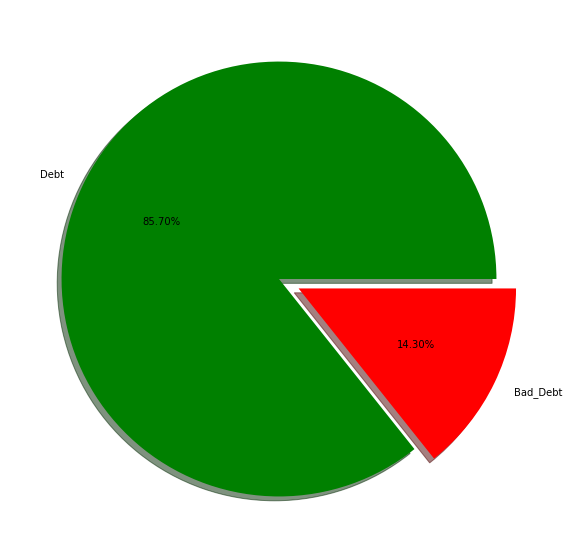

In [41]:
Total_Debt = pd.DataFrame({'total_debt':[debt_data['debt'].sum().round(2)], 'total_bad_dept':[debt_data['Bad_debt'].sum().round(2)]})

# Showing Overall Debt & Bad Debt % through Pie Chart
fig = plt.figure(figsize=(10, 10))
explode = (0, 0.1,)
plt.pie(Total_Debt.loc[0], labels=['Debt', 'Bad_Debt'],colors = ['g', 'r'],explode = explode,shadow = True, autopct='%1.2f%%')

In [42]:
select_1 = pd.concat([debt_data,train_data_mod['city']], axis = 1)
select_1

,UID,type,second_mortgage,debt,home_equity,home_equity_second_mortgage,Bad_debt,city
0,267822,City,0.02077,0.52963,0.08919,0.01588,0.09408,Hamilton
1,246444,City,0.02222,0.60855,0.04274,0.02222,0.04274,South Bend
2,245683,City,0.00000,0.73484,0.09512,0.00000,0.09512,Danville
3,279653,Urban,0.01086,0.52714,0.01086,0.01086,0.01086,San Juan
4,247218,City,0.05426,0.51938,0.05426,0.05426,0.05426,Manhattan
...,...,...,...,...,...,...,...,...
27316,279212,Urban,0.00000,0.11694,0.00000,0.00000,0.00000,Coamo
27317,277856,Borough,0.02112,0.65364,0.19641,0.00845,0.20908,Blue Bell
27318,233000,City,0.02024,0.58095,0.07857,0.02024,0.07857,Weldona
27319,287425,Town,0.07550,0.65722,0.12556,0.05801,0.14305,Colleyville


In [43]:
# Exporting Data frames through Excel Files for Further Analysis
writer = pd.ExcelWriter('C:/Users/saipa/Desktop/real_estate.xlsx' , engine = 'xlsxwriter')

train_data_mod.to_excel(writer, sheet_name = 'train_data', index = False)
location.to_excel(writer, sheet_name = 'location', index = False)
select_1.to_excel(writer, sheet_name = 'Debt Analysis', index = False)

writer.save()

In [44]:
# Analysisng Second mortage, home equity, good debt and bad debt in top 10 Cities
select_1 = pd.concat([debt_data,train_data_mod['city']], axis = 1)
select_1['city'].value_counts().head(15)

Chicago         292
Brooklyn        278
Los Angeles     236
Houston         219
Philadelphia    163
San Antonio     139
Baltimore       134
Las Vegas       126
Bronx           120
Phoenix         116
Miami           109
Dallas          104
Detroit         103
Columbus         98
New York         95
Name: city, dtype: int64

In [45]:
selected_cities = select_1.loc[select_1['city'].isin(['Chicago','Brooklyn','Los Angeles','Houston','Philadelphia','San Antonio','Baltimore','Las Vegas','Bronx','Phoenix'])]
selected_cities

,UID,type,second_mortgage,debt,home_equity,home_equity_second_mortgage,Bad_debt,city
10,225738,City,0.00000,0.57377,0.00000,0.00000,0.00000,Los Angeles
19,267431,City,0.00000,0.65072,0.06220,0.00000,0.06220,Brooklyn
21,265422,City,0.06256,0.86693,0.19662,0.06256,0.19662,Las Vegas
32,278415,Borough,0.00000,0.60809,0.03699,0.00000,0.03699,Philadelphia
38,283137,Town,0.00000,0.56216,0.01838,0.00000,0.01838,San Antonio
...,...,...,...,...,...,...,...,...
27277,283229,Town,0.00000,0.44530,0.02157,0.00000,0.02157,San Antonio
27287,278140,Borough,0.00000,0.63431,0.02871,0.00000,0.02871,Philadelphia
27296,251500,CDP,0.00644,0.50644,0.11266,0.00644,0.11266,Baltimore
27312,283346,Town,0.02933,0.84267,0.12667,0.01200,0.14400,San Antonio


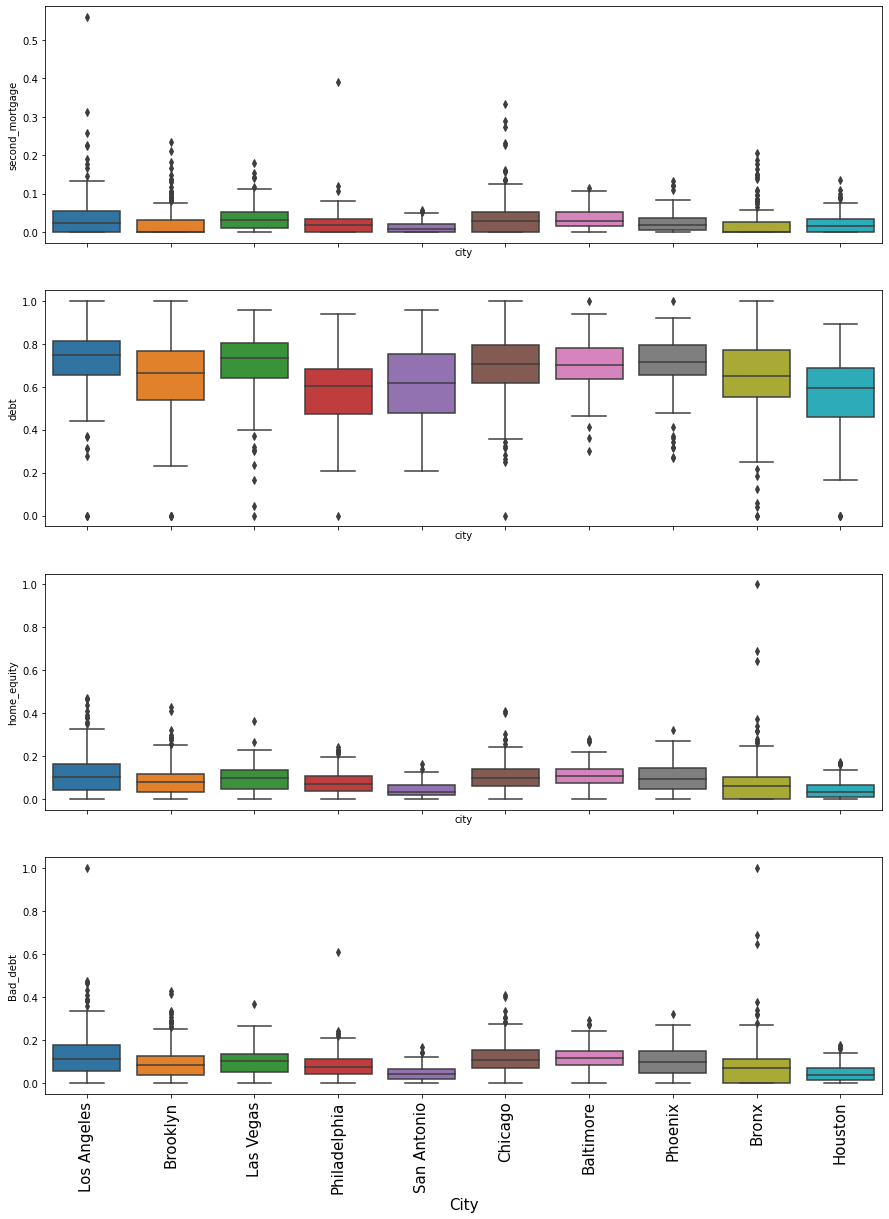

In [46]:
# Creating Box Plot for Better Analysis
i = ['second_mortgage','debt','home_equity','Bad_debt']
fig, axes = plt.subplots(4, sharex = True, figsize = (15,20))
for variable, ax in zip(i, axes.flatten()):
    sns.boxplot(y=variable, x= 'city', data=selected_cities, orient='v', ax=ax)
plt.xlabel('City',fontsize = 15)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

In [47]:
income = train_data_mod[['UID','rent_mean','hi_mean','family_mean']]

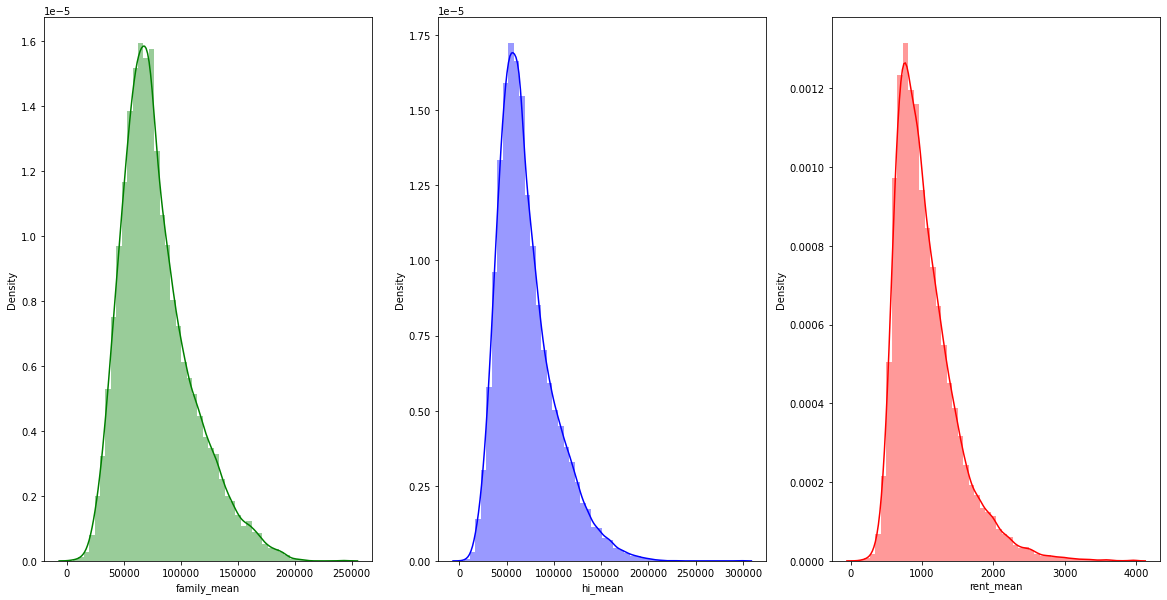

In [48]:
# Distribution plot for family income, house hold income and remaining Income
income = train_data_mod[['UID','rent_mean','hi_mean','family_mean']]
fig, axes = plt.subplots(1,3, figsize = (20,10))
sns.distplot(income['family_mean'], ax=axes[0], color = 'g')
sns.distplot(income['hi_mean'], ax=axes[1], color = 'b')
sns.distplot(income['rent_mean'], ax=axes[2], color = 'r')
plt.show()

In [49]:
select_3 = train_data_mod[['UID', 'COUNTYID', 'STATEID', 'state','city', 'place','lat', 'lng', 'ALand','pop', 'male_pop', 'female_pop','male_age_median','female_age_median']]
select_3

,UID,COUNTYID,STATEID,state,city,place,lat,lng,ALand,pop,male_pop,female_pop,male_age_median,female_age_median
0,267822,53,36,New York,Hamilton,Hamilton,42.840812,-75.501524,2.021834e+08,5230,2612,2618,44.00000,45.33333
1,246444,141,18,Indiana,South Bend,Roseland,41.701441,-86.266614,1.560828e+06,2633,1349,1284,32.00000,37.58333
2,245683,63,18,Indiana,Danville,Danville,39.792202,-86.515246,6.956160e+07,6881,3643,3238,40.83333,42.83333
3,279653,127,72,Puerto Rico,San Juan,Guaynabo,18.396103,-66.104169,1.105793e+06,2700,1141,1559,48.91667,50.58333
4,247218,161,20,Kansas,Manhattan,Manhattan City,39.195573,-96.569366,2.554403e+06,5637,2586,3051,22.41667,21.58333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27316,279212,43,72,Puerto Rico,Coamo,Coamo,18.076060,-66.358379,6.970300e+05,1847,909,938,41.66667,40.16667
27317,277856,91,42,Pennsylvania,Blue Bell,Blue Bell,40.158138,-75.307271,5.077337e+06,4155,2116,2039,38.83333,39.50000
27318,233000,87,8,Colorado,Weldona,Saddle Ridge,40.410316,-103.814003,1.323262e+09,2829,1465,1364,42.00000,46.33333
27319,287425,439,48,Texas,Colleyville,Colleyville City,32.904866,-97.162151,1.865230e+07,11542,5727,5815,46.66667,43.41667


In [50]:
# Finding Population Density & Average Age
select_3['Pop_Density'] = train_data_mod['pop']/train_data_mod['ALand']
select_3['median_age'] = (train_data_mod['male_age_median'] + train_data_mod['female_age_median'])/2
select_3.head()

,UID,COUNTYID,STATEID,state,city,place,lat,lng,ALand,pop,male_pop,female_pop,male_age_median,female_age_median,Pop_Density,median_age
0,267822,53,36,New York,Hamilton,Hamilton,42.840812,-75.501524,202183361.0,5230,2612,2618,44.00000,45.33333,0.000026,44.666665
1,246444,141,18,Indiana,South Bend,Roseland,41.701441,-86.266614,1560828.0,2633,1349,1284,32.00000,37.58333,0.001687,34.791665
2,245683,63,18,Indiana,Danville,Danville,39.792202,-86.515246,69561595.0,6881,3643,3238,40.83333,42.83333,0.000099,41.833330
3,279653,127,72,Puerto Rico,San Juan,Guaynabo,18.396103,-66.104169,1105793.0,2700,1141,1559,48.91667,50.58333,0.002442,49.750000
4,247218,161,20,Kansas,Manhattan,Manhattan City,39.195573,-96.569366,2554403.0,5637,2586,3051,22.41667,21.58333,0.002207,22.000000


In [51]:
# Finding Statewise Population Density
population = select_3.groupby('state')['Pop_Density'].mean().reset_index()
population = population.sort_values(by='Pop_Density', ascending=False).reset_index(drop=True)
population

,state,Pop_Density
0,New York,0.009404
1,District of Columbia,0.006438
2,California,0.003334
3,Hawaii,0.003253
4,New Jersey,0.003222
5,Massachusetts,0.002864
6,Illinois,0.002803
7,Puerto Rico,0.002117
8,Pennsylvania,0.002060
9,Rhode Island,0.001947


Text(0, 0.5, 'Populaion Density')

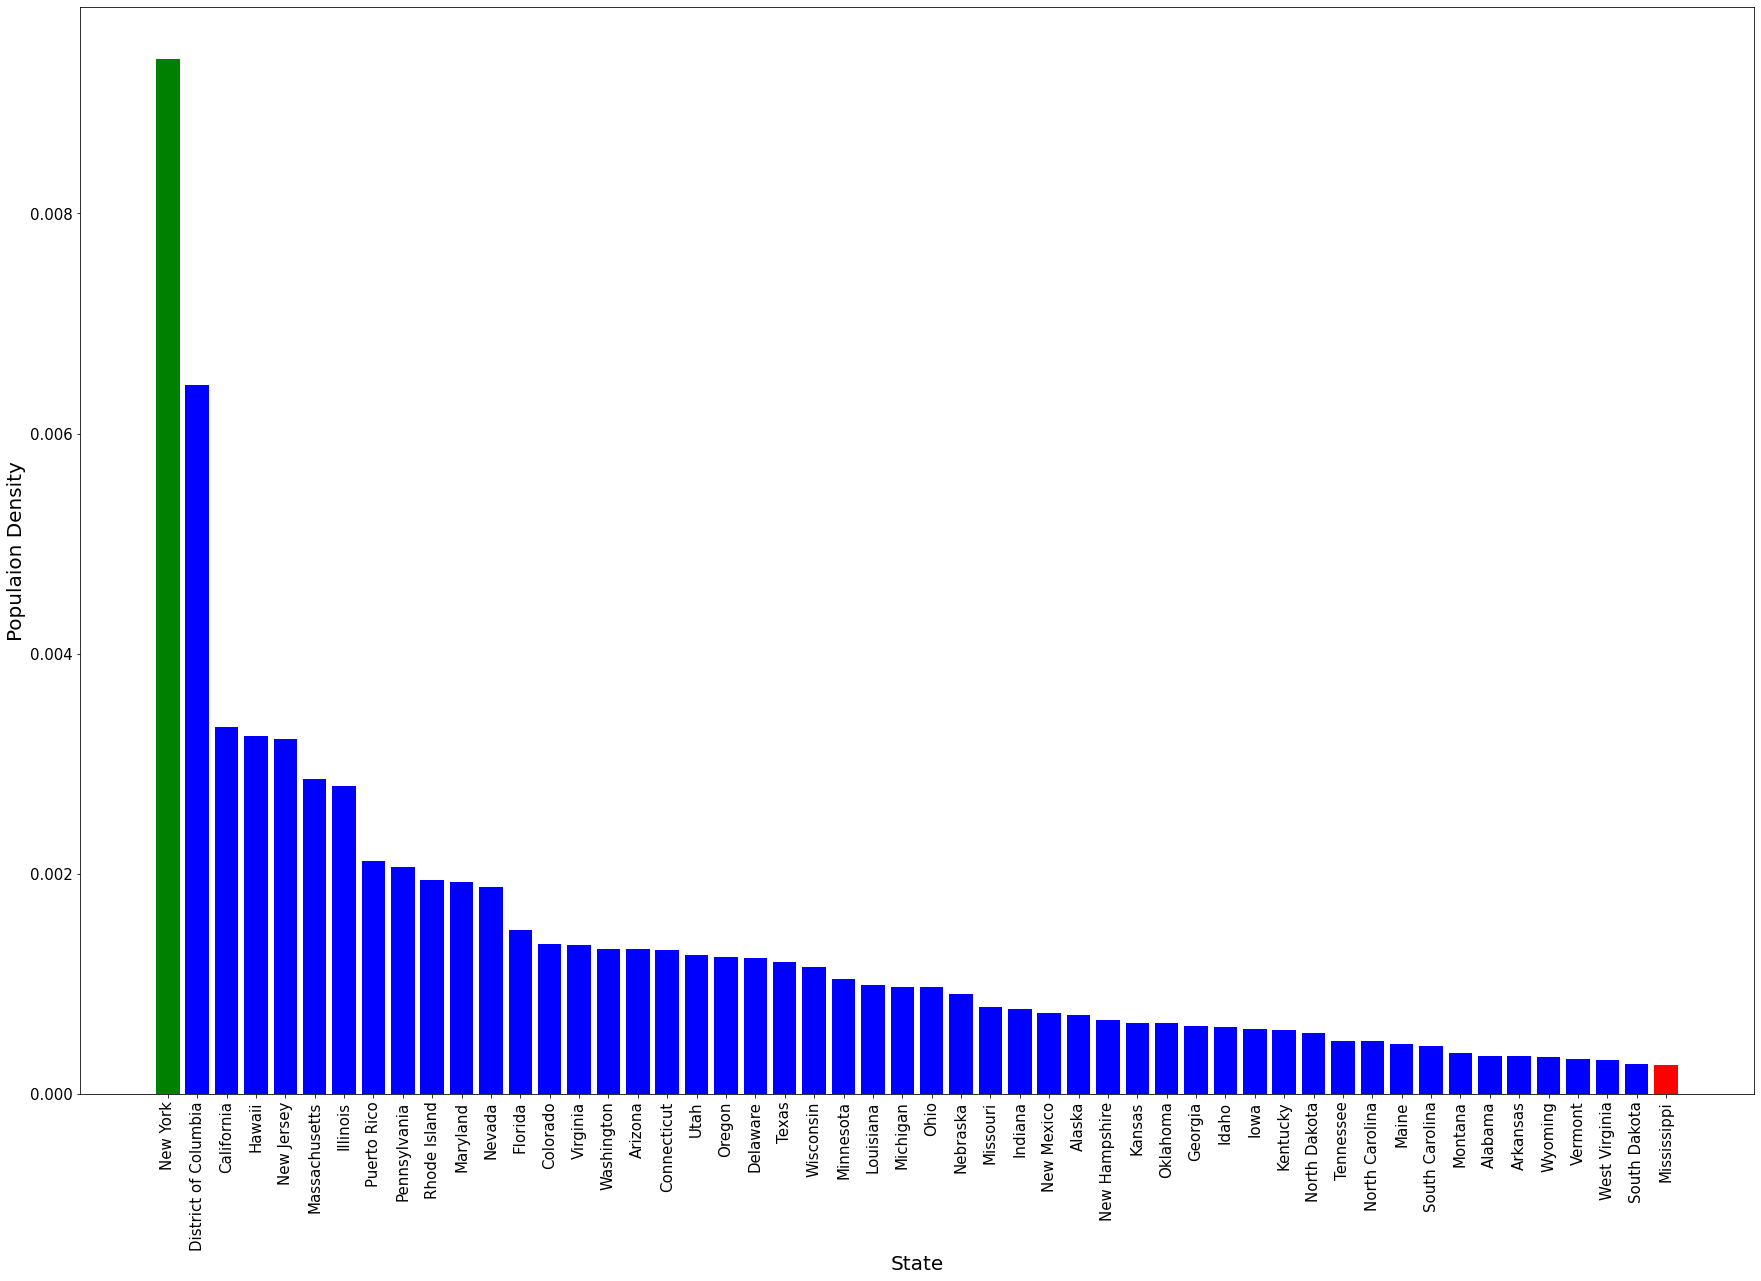

In [52]:
# Finding States having High & Low Population Desity
colors = ['g' if (bar == max(population['Pop_Density'])) else 'r' if (bar == min(population['Pop_Density'])) else 'blue' for bar in population['Pop_Density']]
plt.figure(figsize = (30,20))
plt.bar('state','Pop_Density', data = population, color = colors)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State', fontsize=20)
plt.ylabel('Populaion Density', fontsize=20)

#### Newyork has High population Density
#### Mississippi has Low population Density

In [53]:
# Finding Average Age people in each State
age = select_3.groupby('state')['median_age'].mean().reset_index()
age = age.sort_values(by='median_age', ascending=False).reset_index(drop=True)
age

,state,median_age
0,Maine,44.266025
1,Vermont,44.041666
2,Florida,43.610649
3,West Virginia,43.267113
4,New Hampshire,42.114955
5,Montana,42.113194
6,Connecticut,41.180641
7,Oregon,41.020704
8,Delaware,40.988263
9,Pennsylvania,40.875684


Text(0, 0.5, 'Age')

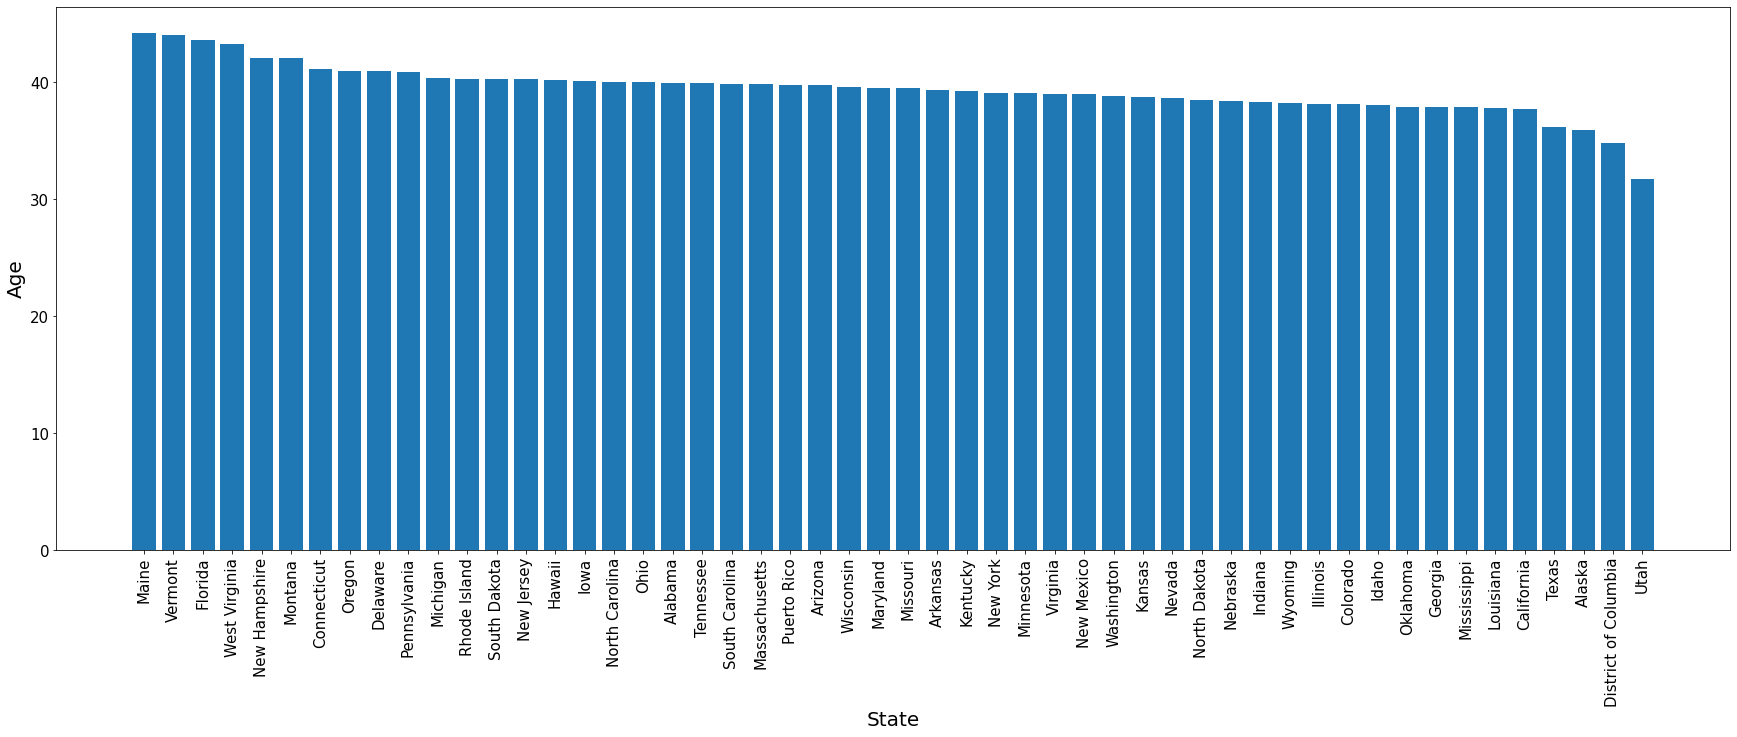

In [54]:
plt.figure(figsize = (30,10))
plt.bar('state','median_age', data = age)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State', fontsize=20)
plt.ylabel('Age', fontsize=20)

In [55]:
train_data_mod.reset_index()

,index,UID,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,0,267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,1,246444,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,2,245683,63,18,Indiana,IN,Danville,Danville,City,tract,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,3,279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,4,247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27156,27316,279212,43,72,Puerto Rico,PR,Coamo,Coamo,Urban,tract,...,42.73154,40.16667,24.79821,230.87898,938.0,0.60422,0.24603,0.03042,0.02249,0.14683
27157,27317,277856,91,42,Pennsylvania,PA,Blue Bell,Blue Bell,Borough,tract,...,38.21269,39.50000,21.84826,496.20427,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888
27158,27318,233000,87,8,Colorado,CO,Weldona,Saddle Ridge,City,tract,...,43.40218,46.33333,23.40858,316.52078,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712
27159,27319,287425,439,48,Texas,TX,Colleyville,Colleyville City,Town,tract,...,39.25921,43.41667,21.36235,1373.94120,5815.0,0.93970,0.75503,0.02287,0.00915,0.05261


In [56]:
# Dividing Low, Median, High, Very High Populated Categories
select_4 = train_data_mod[['UID', 'pop', 'married', 'separated', 'divorced']]
select_4['Pop_Bins'] = pd.cut(select_4['pop'], bins= 4, labels=['low','median','high','very high'])
select_4

,UID,pop,married,separated,divorced,Pop_Bins
0,267822,5230,0.57851,0.01240,0.08770,low
1,246444,2633,0.34886,0.01426,0.09030,low
2,245683,6881,0.64745,0.01607,0.10657,low
3,279653,2700,0.47257,0.02021,0.10106,low
4,247218,5637,0.12356,0.00000,0.03109,low
...,...,...,...,...,...,...
27316,279212,1847,0.24603,0.02249,0.14683,low
27317,277856,4155,0.61127,0.02473,0.04888,low
27318,233000,2829,0.70451,0.00520,0.07712,low
27319,287425,11542,0.75503,0.00915,0.05261,low


In [57]:
select_4['Pop_Bins'].value_counts()

low          27063
median          92
high             5
very high        1
Name: Pop_Bins, dtype: int64

In [58]:
# Finding Marital Status in each Category
marital_status = round(select_4.groupby('Pop_Bins')[['married', 'separated', 'divorced']].mean()*100,2)
marital_status

,married,separated,divorced
Pop_Bins,,,
low,50.91,1.91,10.05
median,59.91,1.17,6.62
high,61.79,1.05,7.39
very high,73.47,0.40,3.04


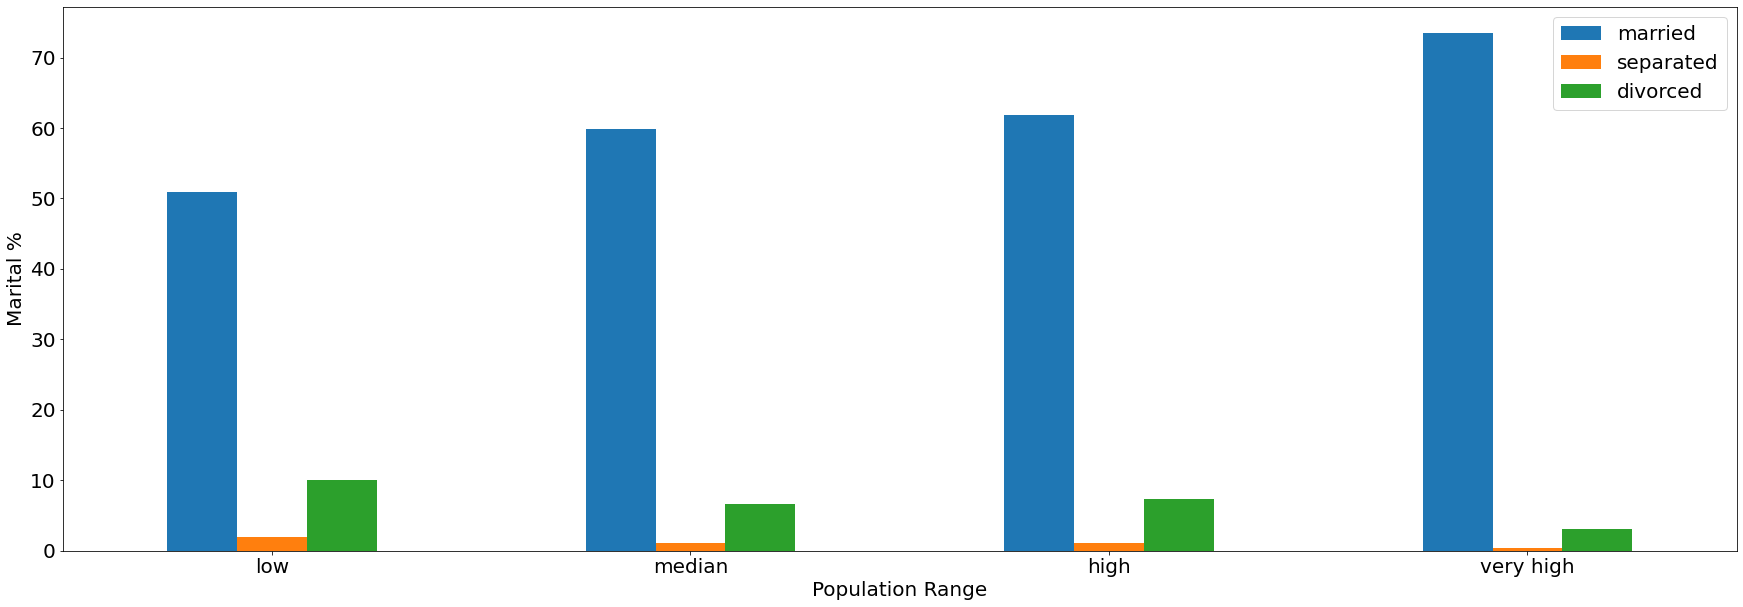

In [59]:
# Analysing Marital Status 
marital_status.plot(kind = 'bar', figsize = (30,10))
plt.xticks(rotation = 0, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Population Range', fontsize=20)
plt.ylabel('Marital %', fontsize=20)
plt.legend(fontsize = 20)

In [60]:
# Finding states where people spending money on rents
select_5 = train_data_mod[['state','city','rent_mean','family_mean']]
rent_analysis = train_data_mod.groupby("city")[['rent_mean','family_mean']].mean().reset_index()
rent_analysis['rent%'] = (rent_analysis['rent_mean']/rent_analysis['family_mean'])*100
rent_analysis = rent_analysis.sort_values(by = 'rent%', ascending = False)
rent_analysis = rent_analysis.head(10).reset_index(drop=True)
rent_analysis

,city,rent_mean,family_mean,rent%
0,Statesboro,994.705090,27245.29909,3.650924
1,Beale Afb,1525.439260,44622.02550,3.418579
2,Asbury Park,1316.761580,43522.58730,3.025467
3,Wellston,776.974500,27163.83850,2.860327
4,Waller,624.500000,22499.50000,2.775617
5,Oakton,1496.396230,54119.27465,2.764997
6,Ft Riley,1249.748300,45649.09455,2.737729
7,Ft Meade,2020.256090,73793.54275,2.737714
8,Sausalito,1228.503420,46033.45384,2.668719
9,Adelanto,930.714175,34951.05921,2.662907


Text(0, 0.5, 'rent%')

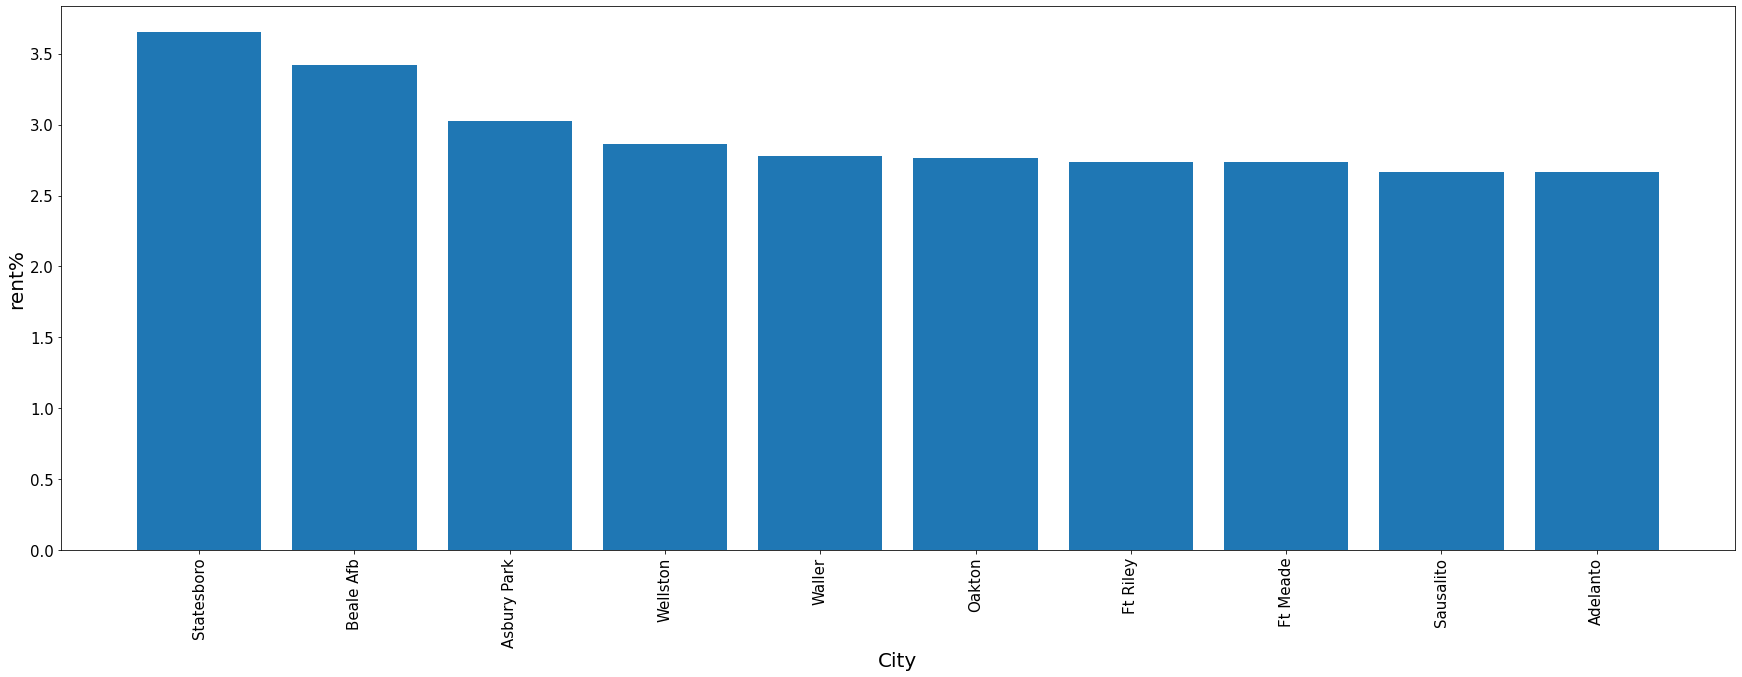

In [61]:
plt.figure(figsize = (30,10))
plt.bar('city','rent%', data = rent_analysis)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('City', fontsize=20)
plt.ylabel('rent%', fontsize=20)

In [62]:
num_data = train_data_mod.iloc[:,15:79]

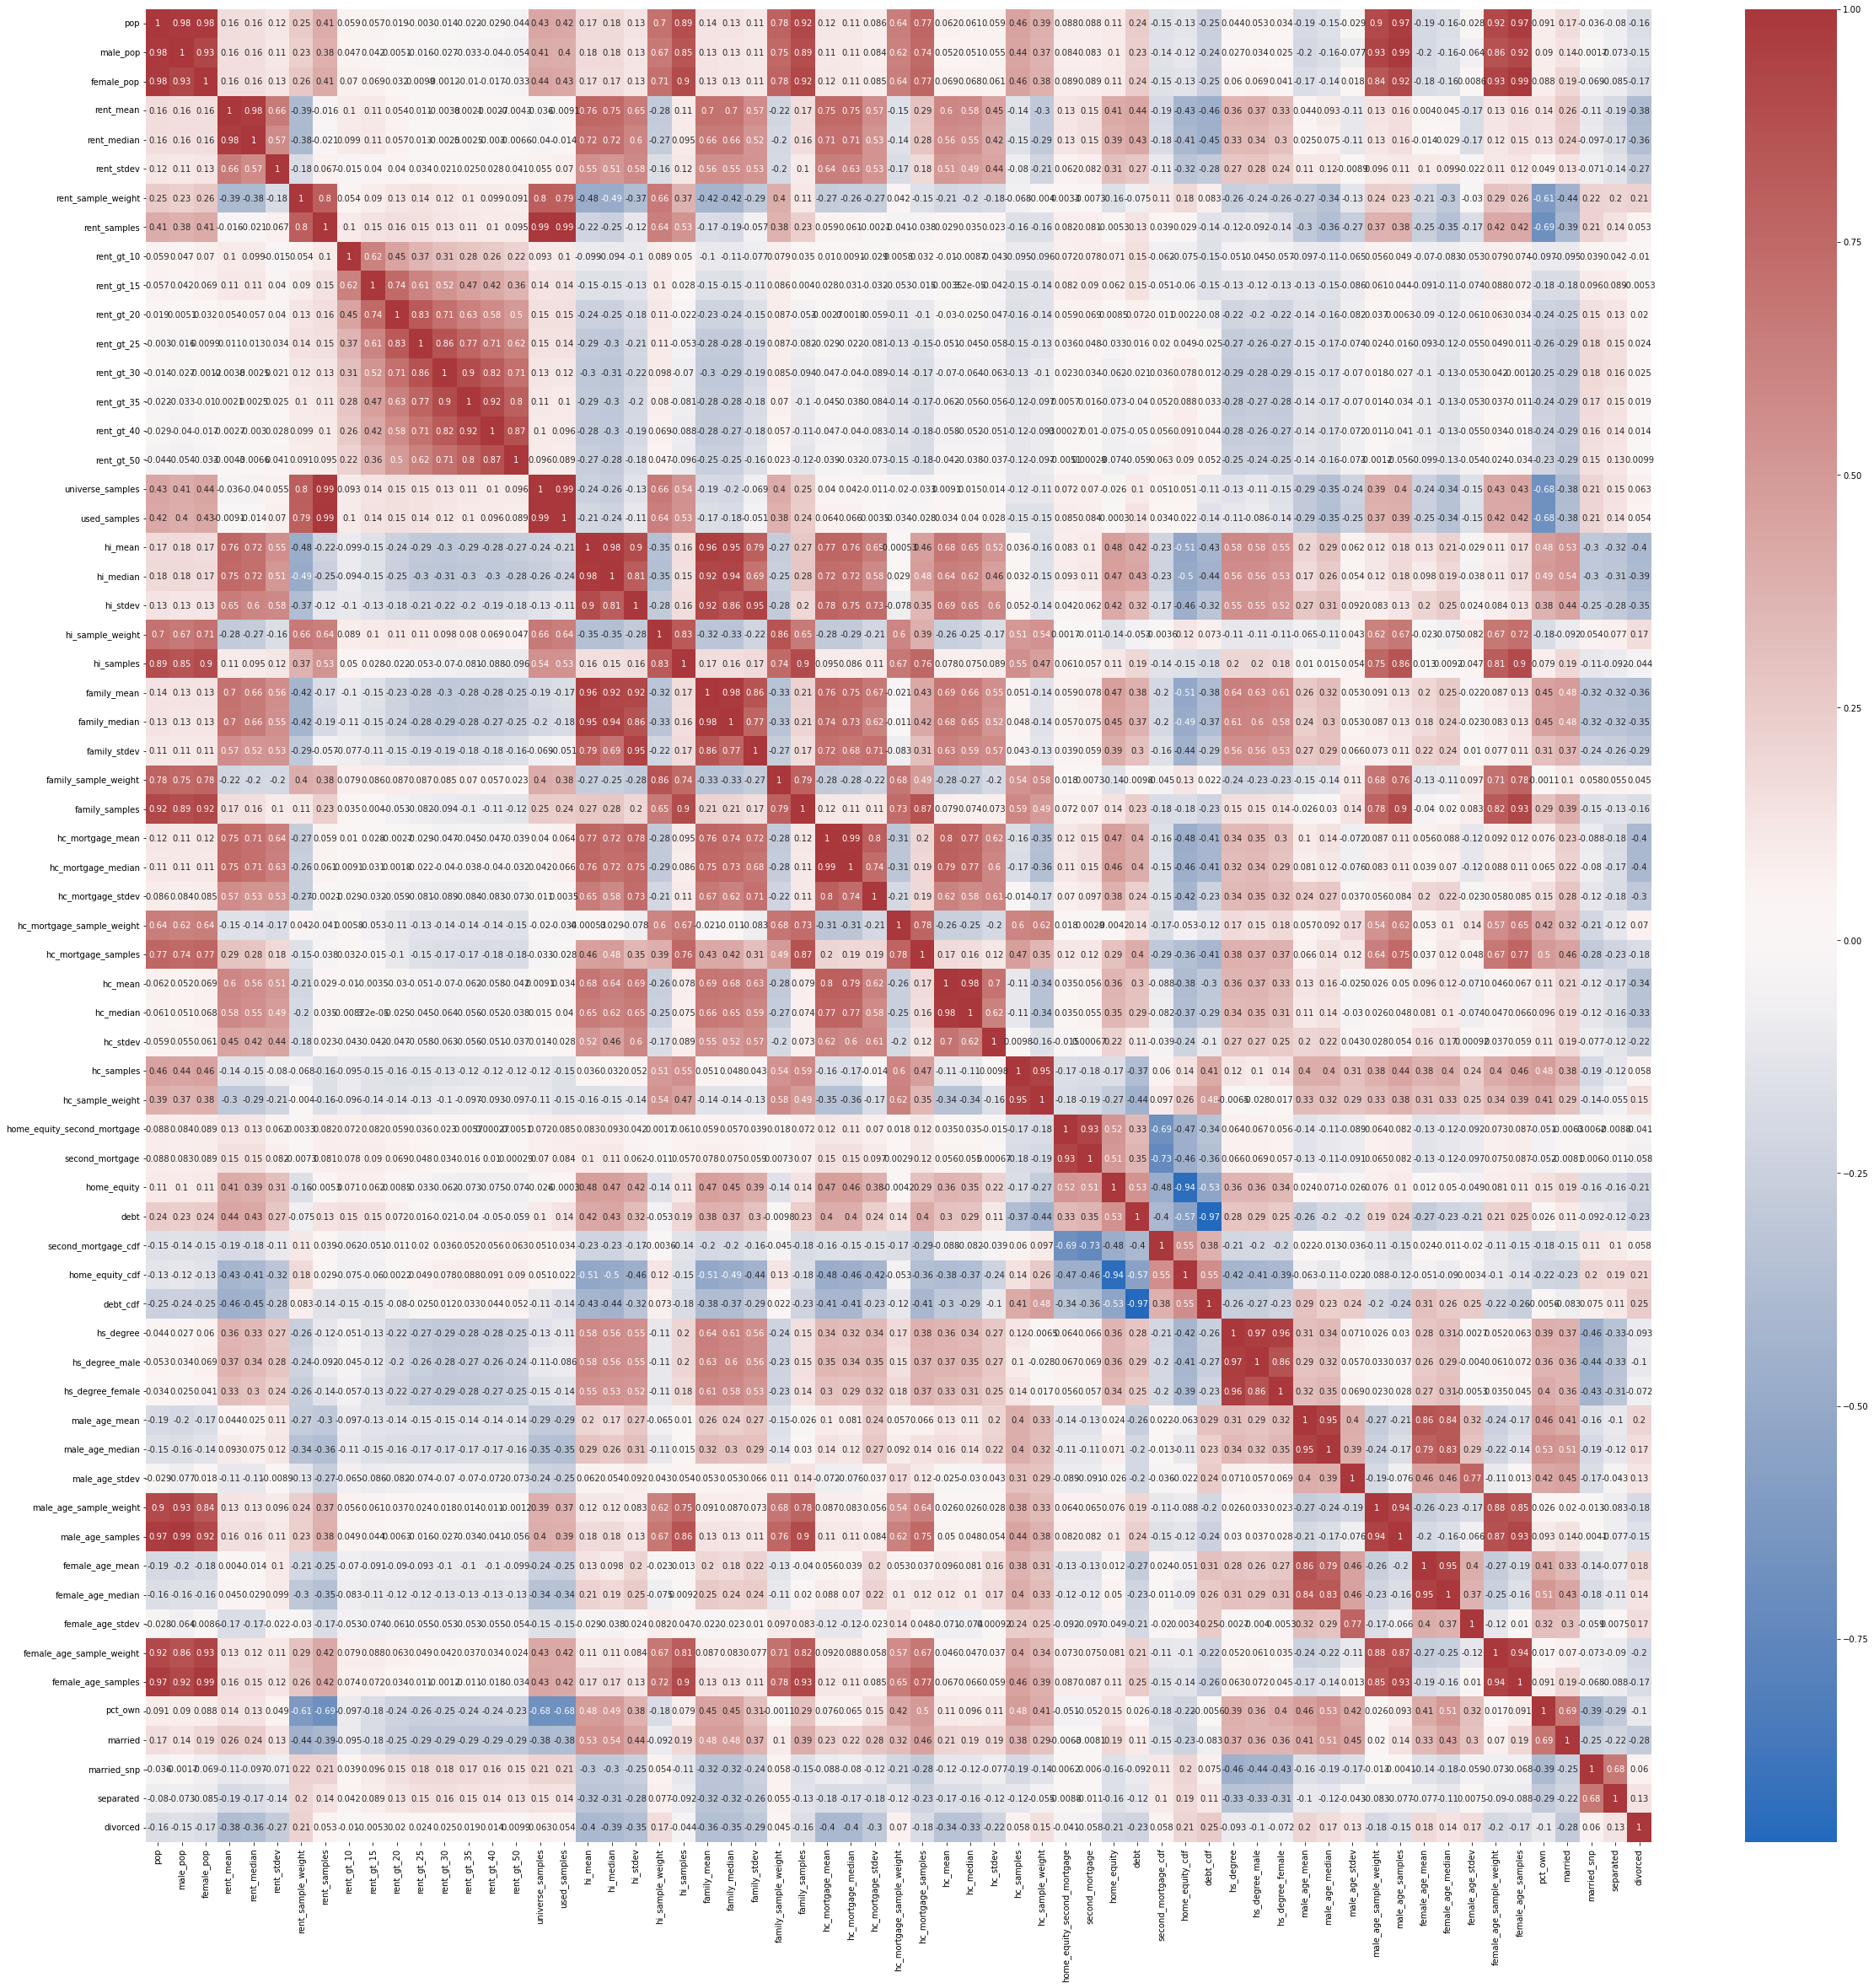

In [63]:
# Plotting variable Correlation matrix using Heat map
num_data = train_data_mod.iloc[:,15:79]
plt.figure(figsize = (40,40))
color = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(num_data.corr(), annot = True, cmap = color)
plt.show()

#### From Above Chart More variables are correlated where pearson correlation coefficient is above 0.8

In [64]:
# Dropping varibles having pearson correlation coefficient is above 0.8
num_data_mod = num_data.drop(['male_pop', 'female_pop', 'rent_median','rent_sample_weight','hi_stdev', 'rent_samples', 'used_samples', 'hi_median', 'hi_sample_weight', 'family_median', 'family_stdev', 'family_sample_weight', 'hc_mortgage_mean', 'hc_mortgage_median','hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_median', 'hc_stdev', 'hc_sample_weight','home_equity_second_mortgage','second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf','hs_degree_male', 'hs_degree_female','male_age_median', 'male_age_sample_weight', 'female_age_median', 'female_age_sample_weight','female_age_samples','male_age_samples','rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40','family_samples','hi_mean',
       'rent_gt_50'], axis = 1)

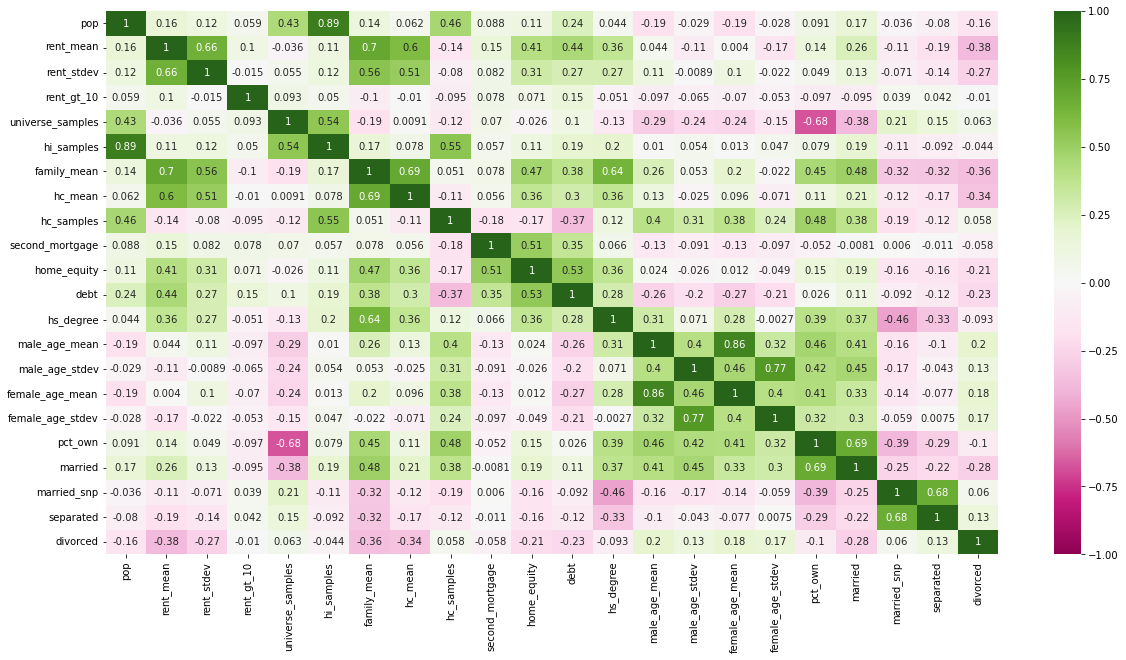

In [65]:
plt.figure(figsize = (20,10))
#color = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(num_data_mod.corr(), annot = True, cmap = "PiYG", vmin = -1, vmax = 1)
plt.show()

In [66]:
heat_map = num_data_mod.corr()
heat_map

,pop,rent_mean,rent_stdev,rent_gt_10,universe_samples,hi_samples,family_mean,hc_mean,hc_samples,second_mortgage,...,hs_degree,male_age_mean,male_age_stdev,female_age_mean,female_age_stdev,pct_own,married,married_snp,separated,divorced
pop,1.000000,0.164518,0.120548,0.059426,0.431851,0.889110,0.135665,0.062048,0.456883,0.087561,...,0.044315,-0.190308,-0.029380,-0.194049,-0.027931,0.090914,0.168546,-0.036044,-0.080423,-0.161777
rent_mean,0.164518,1.000000,0.655815,0.100699,-0.036173,0.106579,0.702829,0.595295,-0.143141,0.153259,...,0.363195,0.043838,-0.109142,0.004007,-0.169141,0.139834,0.257297,-0.108765,-0.187907,-0.377093
rent_stdev,0.120548,0.655815,1.000000,-0.014966,0.055107,0.118823,0.560093,0.509374,-0.079908,0.082097,...,0.270181,0.110224,-0.008934,0.102093,-0.021814,0.048692,0.131734,-0.071414,-0.136733,-0.270126
rent_gt_10,0.059426,0.100699,-0.014966,1.000000,0.093188,0.050133,-0.100830,-0.010437,-0.094963,0.078170,...,-0.051471,-0.097376,-0.064998,-0.070450,-0.053009,-0.097319,-0.095278,0.038798,0.041890,-0.010356
universe_samples,0.431851,-0.036173,0.055107,0.093188,1.000000,0.543564,-0.191072,0.009074,-0.120454,0.070410,...,-0.130948,-0.287324,-0.237452,-0.244224,-0.146572,-0.679645,-0.381248,0.207816,0.145567,0.063439
hi_samples,0.889110,0.106579,0.118823,0.050133,0.543564,1.000000,0.168546,0.078207,0.553910,0.057171,...,0.201973,0.010245,0.054243,0.012745,0.047443,0.079308,0.185454,-0.113430,-0.091749,-0.043957
family_mean,0.135665,0.702829,0.560093,-0.100830,-0.191072,0.168546,1.000000,0.691189,0.050796,0.078086,...,0.638235,0.261454,0.053123,0.196927,-0.022313,0.450664,0.484944,-0.319546,-0.324506,-0.359076
hc_mean,0.062048,0.595295,0.509374,-0.010437,0.009074,0.078207,0.691189,1.000000,-0.108689,0.056489,...,0.361535,0.129307,-0.024751,0.095825,-0.071024,0.108381,0.206155,-0.121101,-0.169383,-0.337394
hc_samples,0.456883,-0.143141,-0.079908,-0.094963,-0.120454,0.553910,0.050796,-0.108689,1.000000,-0.180192,...,0.124660,0.395551,0.307273,0.375048,0.244138,0.477452,0.376238,-0.194872,-0.120849,0.058053
second_mortgage,0.087561,0.153259,0.082097,0.078170,0.070410,0.057171,0.078086,0.056489,-0.180192,1.000000,...,0.066125,-0.132781,-0.091056,-0.132651,-0.097185,-0.051767,-0.008056,0.006010,-0.011019,-0.058193


In [67]:
heat_map.to_excel(r'C:/Users/saipa/Desktop/heat_map.xlsx')

### Data Pre-Processing

In [68]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [69]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(num_data)
print (chi_square_value, p_value, '----', 'P value is less than 0.05, so correlation present')

4413974.536365453 0.0 ---- P value is less than 0.05, so correlation present


In [70]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(num_data, 10)

FactorAnalyzer(rotation_kwargs={})

In [71]:
ev, v = fa.get_eigenvalues()

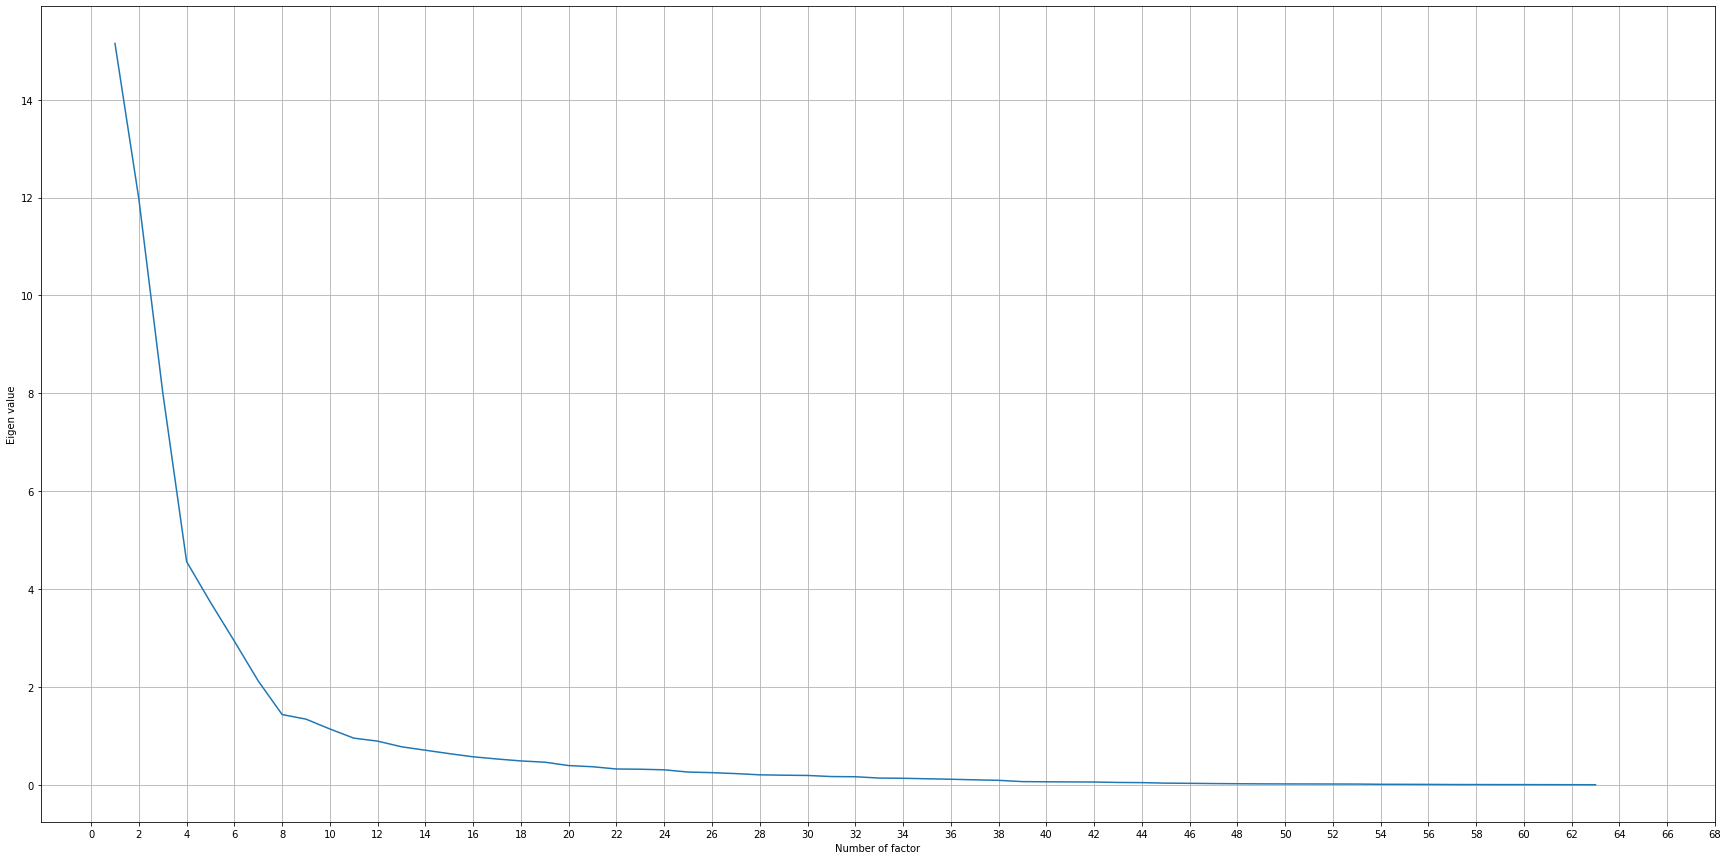

In [72]:
plt.figure(figsize = (30,15))
plt.plot(range(1, num_data.shape[1]+1), ev)
plt.xticks(np.arange(0, 70, step=2))
plt.xlabel('Number of factor')
plt.ylabel('Eigen value')
plt.grid()

In [73]:
# Bend occurs at number of factors = 8
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(num_data)
print(pd.DataFrame(fa.loadings_,index=num_data.columns))

                    0         1         2         3         4         5
pop          0.118933  0.966938  0.012142 -0.104301  0.109253  0.050964
male_pop     0.114523  0.937333 -0.003146 -0.131380  0.091784  0.037757
female_pop   0.118189  0.953988  0.026445 -0.071632  0.123509  0.063739
rent_mean    0.805416  0.061959  0.099647 -0.123162 -0.120141  0.161051
rent_median  0.758182  0.060414  0.096702 -0.137533 -0.128053  0.157779
...               ...       ...       ...       ...       ...       ...
pct_own      0.174457  0.201194 -0.199593  0.468932 -0.710905  0.085110
married      0.300795  0.231423 -0.239355  0.396373 -0.430431  0.079893
married_snp -0.166528 -0.094580  0.193057 -0.215763  0.232848 -0.162039
separated   -0.231463 -0.098237  0.157024 -0.102676  0.187948 -0.117874
divorced    -0.409449 -0.118781 -0.008057  0.264798  0.177398 -0.006171

[63 rows x 6 columns]


### Data Modelling

In [74]:
ytrain = train_data_mod['hc_mortgage_mean']
xtrain = train_data_mod.iloc[:, 15:80]
xtrain.drop('hc_mortgage_mean', axis=1, inplace=True)

In [75]:
ytest = test_data_mod['hc_mortgage_mean']
xtest = test_data_mod.iloc[:, 15:80]
xtest.drop('hc_mortgage_mean', axis=1, inplace=True)

In [76]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((27161, 62), (11677, 62), (27161,), (11677,))

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr = LinearRegression()
lr_model = lr.fit(xtrain,ytrain)
ypredict = lr.predict(xtest)
ypredict

array([1140.63267841, 1512.44819142, 1221.26202037, ..., 1852.99344971,
       1158.67928633, 1387.82858301])

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math
#print ('accuracy_score =' , accuracy_score(ypredict, ytest))
print ('mean_absolute_error =' , mean_absolute_error(ypredict, ytest))
print ('mean_squared_error =' , mean_squared_error(ypredict, ytest))
print ('Root_mean_squared_error =', math.sqrt(mean_squared_error(ypredict, ytest)))
print ("r2_score =" , r2_score(ypredict, ytest))

mean_absolute_error = 44.19105709079225
mean_squared_error = 4993.332509170638
Root_mean_squared_error = 70.66351611100765
r2_score = 0.9871504390934144


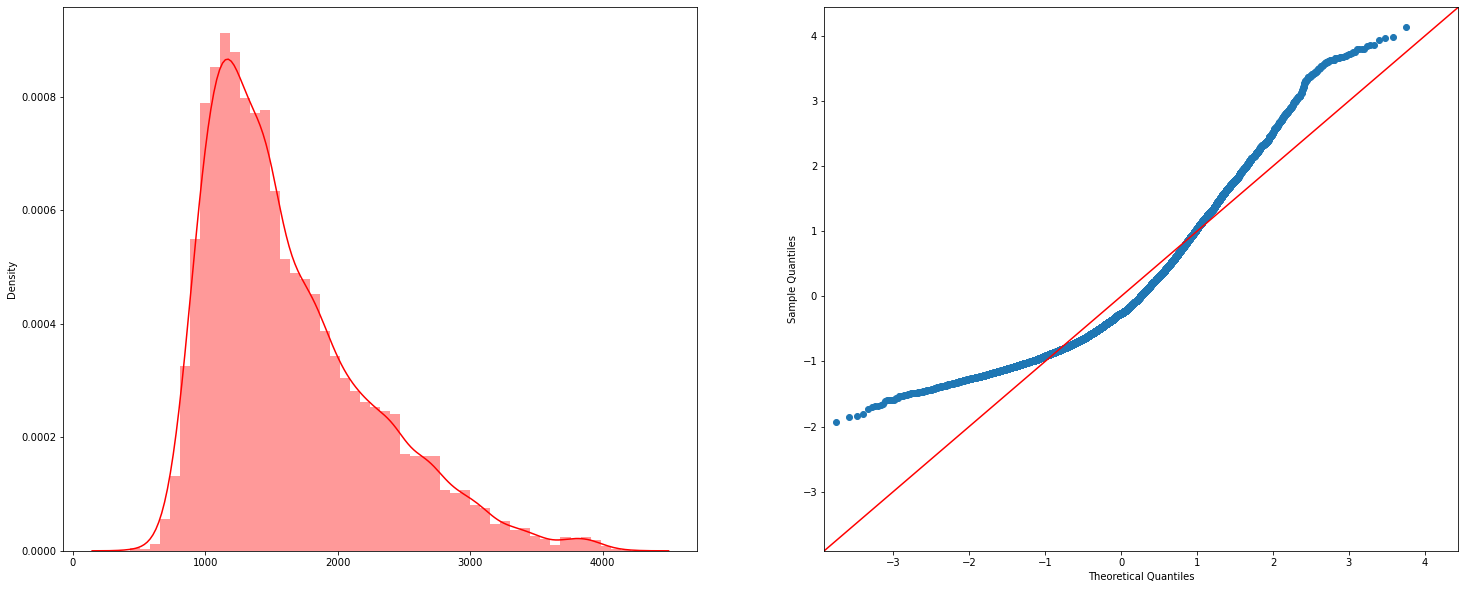

In [80]:
import statsmodels.api as sm
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.distplot(ypredict, color ="red", ax=axes[0])
sm.qqplot(ypredict, line="45", fit=True, ax=axes[1])
plt.show()

In [81]:
states = train_data_mod.state.unique()
state_predict = pd.DataFrame(columns=['State', 'R_Square', 'RMSE'])
for state in states:
    state_data = train_data_mod.loc[train_data_mod['state']==state]
    ytest = state_data['hc_mortgage_mean']
    xtest = state_data.iloc[:, 15:80]
    xtest.drop('hc_mortgage_mean', axis=1, inplace=True)
    ypredict = lr.predict(xtest)
    r_square = r2_score(ypredict, ytest)
    RMSE =  math.sqrt(mean_squared_error(ypredict, ytest))
    state_predict = state_predict.append({'State': state, 'R_Square': r_square, 'RMSE': RMSE}, ignore_index=True)

In [82]:
states = train_data_mod.state.unique()
state_predict = pd.DataFrame(columns=['State', 'R_Square', 'RMSE'])
for state in states:
    state_data = train_data_mod.loc[train_data_mod['state']==state]
    ytest = state_data['hc_mortgage_mean']
    xtest = state_data.iloc[:, 15:80]
    xtest.drop('hc_mortgage_mean', axis=1, inplace=True)
    ypredict = lr.predict(xtest)
    r_square = r2_score(ypredict, ytest)
    RMSE =  math.sqrt(mean_squared_error(ypredict, ytest))
    predict = pd.DataFrame({'State': [state], 'R_Square': [r_square], 'RMSE': [RMSE]})
    state_predict = pd.concat([state_predict, predict], ignore_index = True)

In [83]:
state_predict

,State,R_Square,RMSE
0,New York,0.969437,130.285578
1,Indiana,0.980051,38.170458
2,Puerto Rico,0.977724,48.468817
3,Kansas,0.991668,34.010341
4,Alabama,0.979538,45.823508
5,Texas,0.986252,59.497927
6,South Carolina,0.983701,49.756768
7,California,0.978876,92.631491
8,Arkansas,0.975923,42.635086
9,Maryland,0.981434,70.397956


## Thank You